In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Smoker Status Prediction (Binary Classification)**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    f1_score,
    confusion_matrix
)

# Loading Train and Test Dataset

In [8]:
train = pd.read_csv('/content/drive/MyDrive/dataset/train_dataset.csv')
train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


# **EDA**

In [9]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [10]:
train.shape

(38984, 23)

In [11]:
train.shape

(38984, 23)

In [12]:
print("\n--- Step 1: Data Quality Check ---")
# Check for missing values
missing_values = train.isnull().sum().sum()
print(f"Total Missing Values: {missing_values}")


--- Step 1: Data Quality Check ---
Total Missing Values: 0


In [13]:
# Check for duplicates
duplicates = train.duplicated().sum()
print(f"Total Duplicates: {duplicates}")

Total Duplicates: 5517


In [14]:
# Check Class Imbalance
target_counts = train['smoking'].value_counts(normalize=True)
print("\nTarget Distribution (Smoking):")
print(target_counts)


Target Distribution (Smoking):
smoking
0    0.632721
1    0.367279
Name: proportion, dtype: float64


/tmp/ipython-input-591858683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking', data=train, palette='viridis')


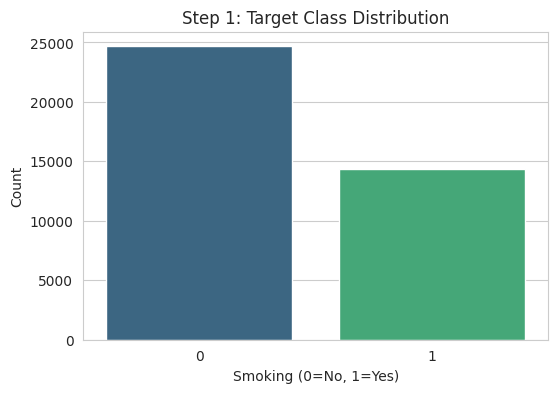

In [15]:
# Visualize Class Imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='smoking', data=train, palette='viridis')
plt.title('Step 1: Target Class Distribution')
plt.xlabel('Smoking (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

In [16]:
# 2. UNIVARIATE ANALYSIS (Distributions)
# ==========================================
print("\n--- Step 2: Univariate Analysis ---")
# Define numerical columns for analysis
numerical_cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic',
                  'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL',
                  'hemoglobin', 'Gtp']


--- Step 2: Univariate Analysis ---


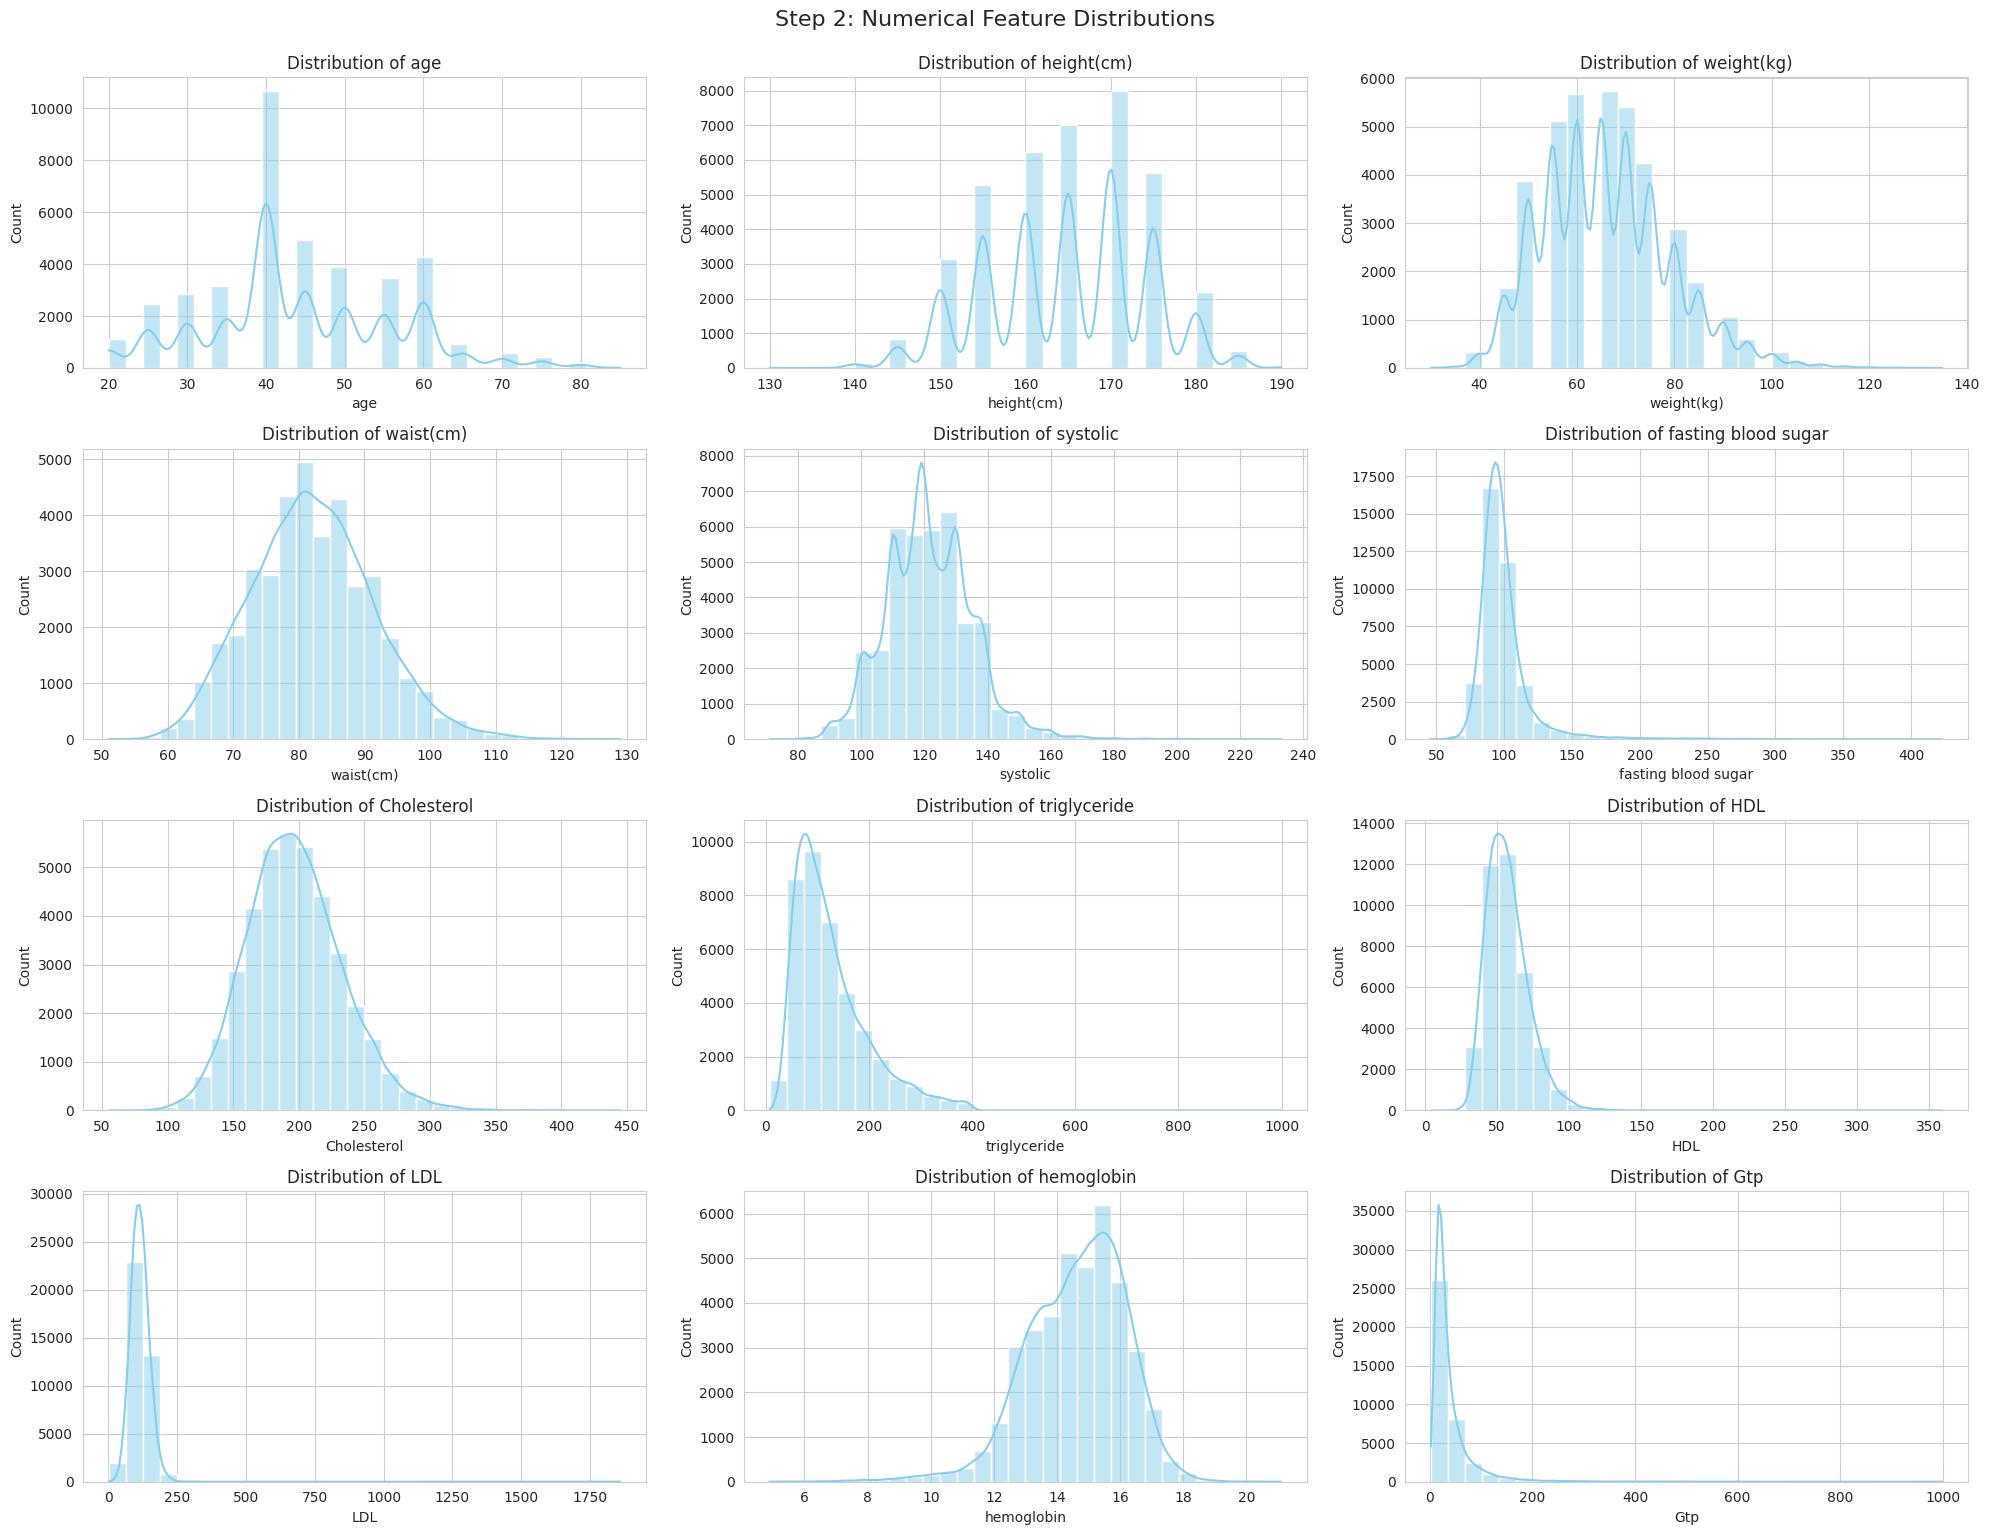

In [17]:
# Plot Histograms for all numerical features
# We use a loop to create a grid of plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.suptitle('Step 2: Numerical Feature Distributions', y=1.02, fontsize=16)
plt.show()

In [18]:
# Check Skewness
skewness = train[numerical_cols].skew().sort_values(ascending=False)
print("\nSkewness of Numerical Features ( > 1 indicates high skew):")
print(skewness[skewness.abs() > 1])


Skewness of Numerical Features ( > 1 indicates high skew):
LDL                    11.764551
Gtp                     6.775446
fasting blood sugar     4.323974
triglyceride            1.336626
HDL                     1.086995
dtype: float64


In [19]:
# 3. BIVARIATE ANALYSIS (Separation)
# ==========================================
print("\n--- Step 3: Bivariate Analysis ---")


--- Step 3: Bivariate Analysis ---


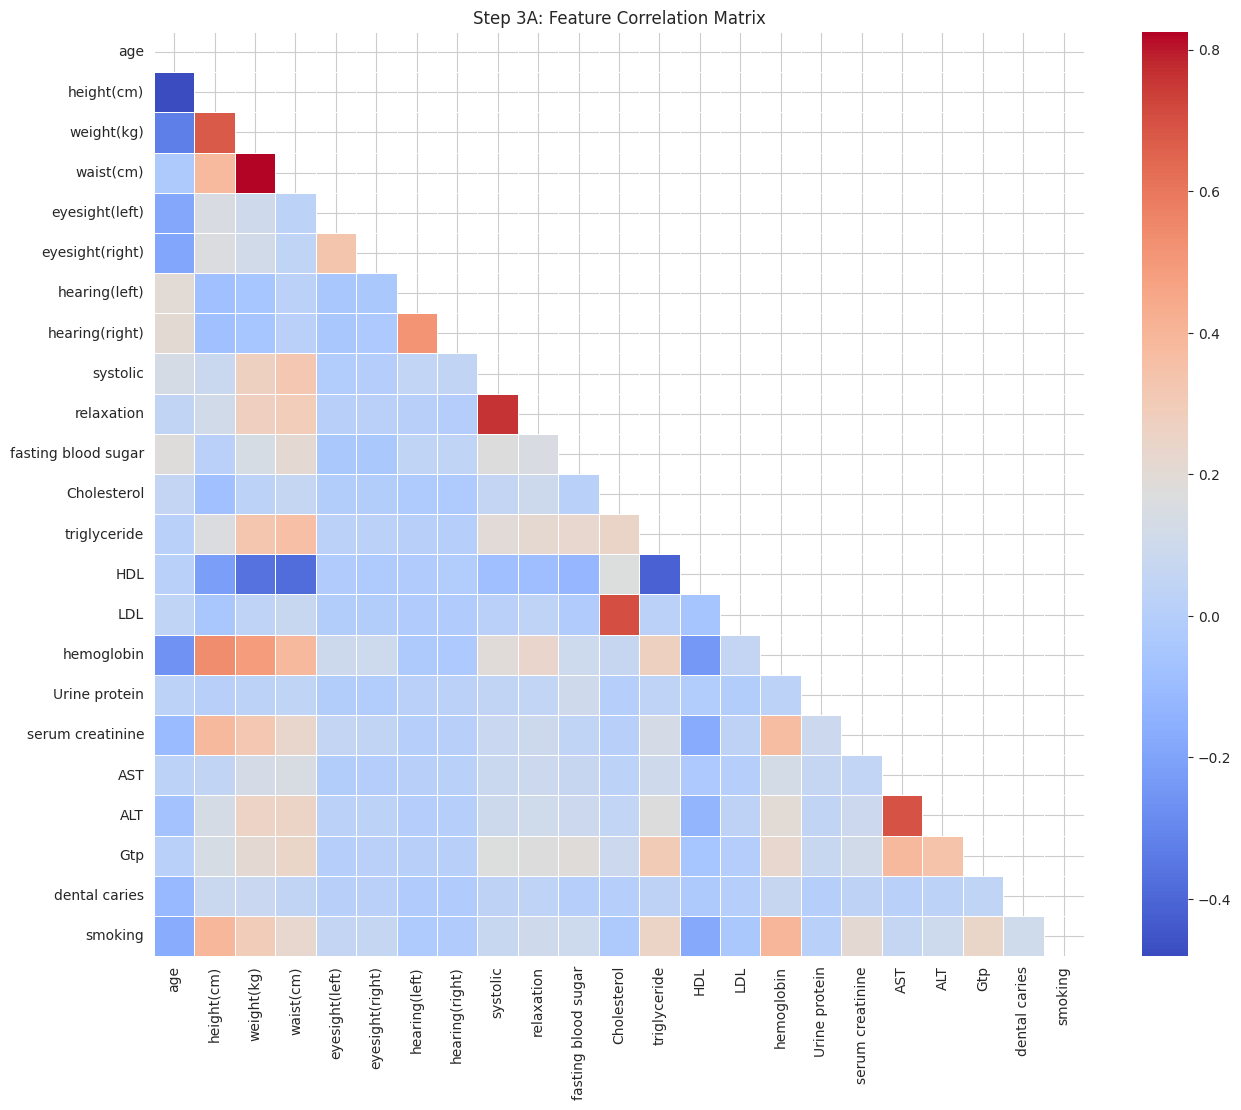

In [20]:
# A. Correlation Heatmap
plt.figure(figsize=(15, 12))
# Calculate correlation matrix
corr = train.corr()
# Mask upper triangle to reduce clutter
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Step 3A: Feature Correlation Matrix')
plt.show()

/tmp/ipython-input-844901773.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoking', y=col, data=train, palette="muted")
/tmp/ipython-input-844901773.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoking', y=col, data=train, palette="muted")
/tmp/ipython-input-844901773.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoking', y=col, data=train, palette="muted")
/tmp/ipython-input-844901773.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

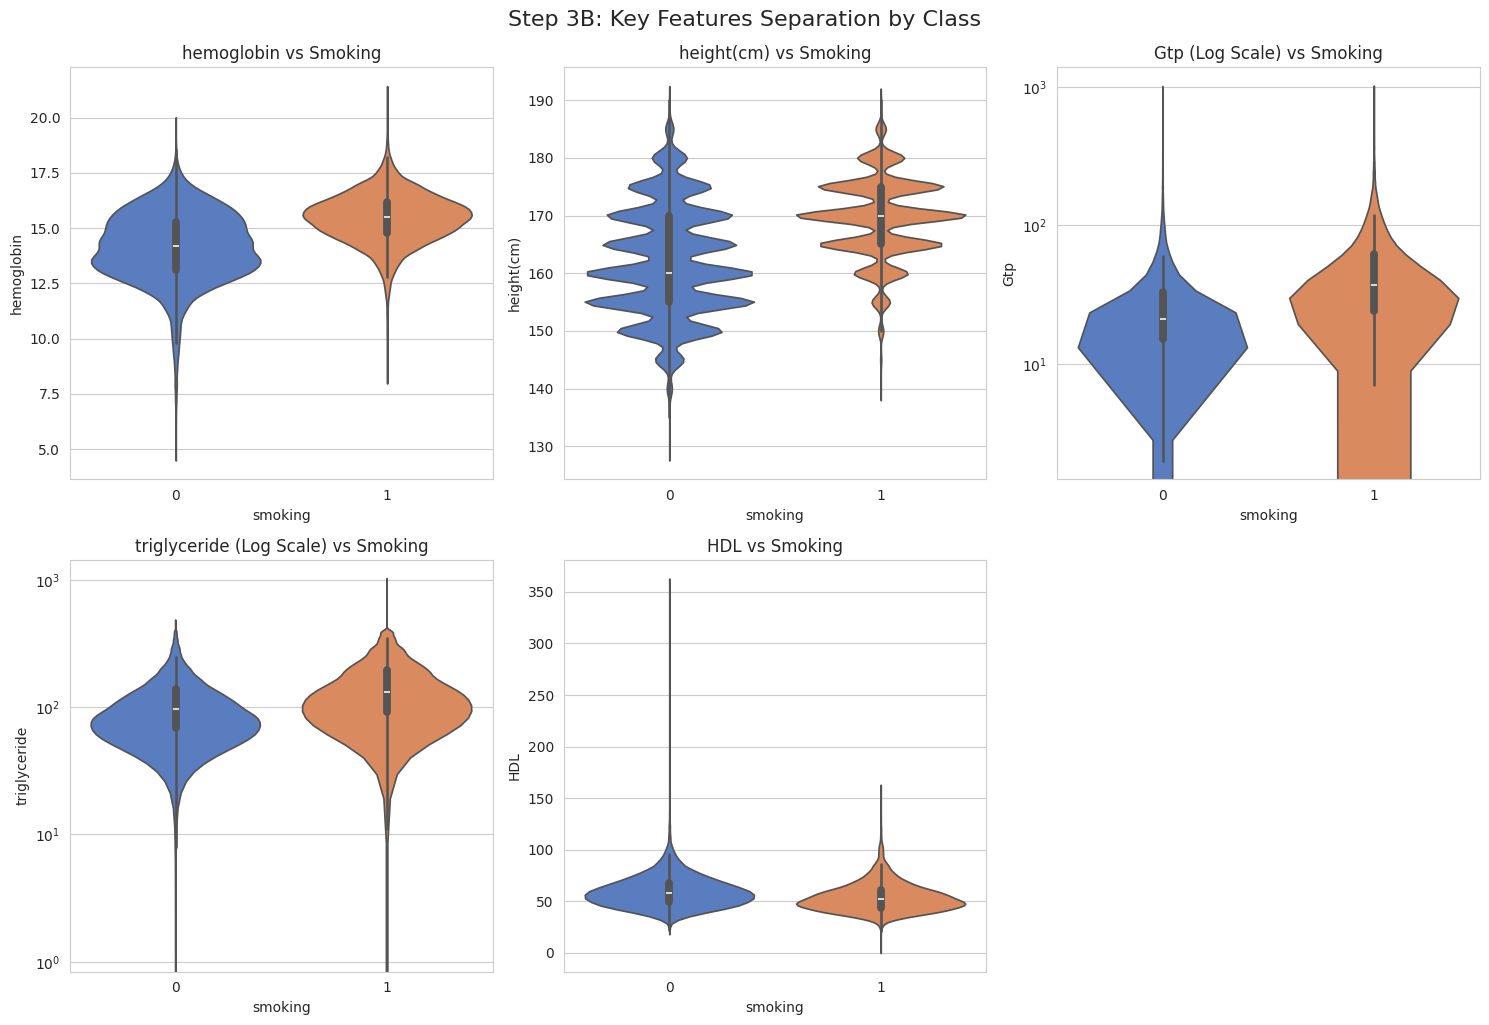

In [21]:
# B. Boxplots/Violin Plots for Top Predictors
# Based on correlation, these are usually the most important features
top_features = ['hemoglobin', 'height(cm)', 'Gtp', 'triglyceride', 'HDL']

plt.figure(figsize=(15, 10))
for i, col in enumerate(top_features):
    plt.subplot(2, 3, i + 1)
    # Using Violin plot to see the density shape + box plot inside
    if col in ['Gtp', 'triglyceride']:
        # Use log scale for highly skewed features
        sns.violinplot(x='smoking', y=col, data=train, palette="muted")
        plt.yscale('log')
        plt.title(f'{col} (Log Scale) vs Smoking')
    else:
        sns.violinplot(x='smoking', y=col, data=train, palette="muted")
        plt.title(f'{col} vs Smoking')
plt.tight_layout()
plt.suptitle('Step 3B: Key Features Separation by Class', y=1.02, fontsize=16)
plt.show()

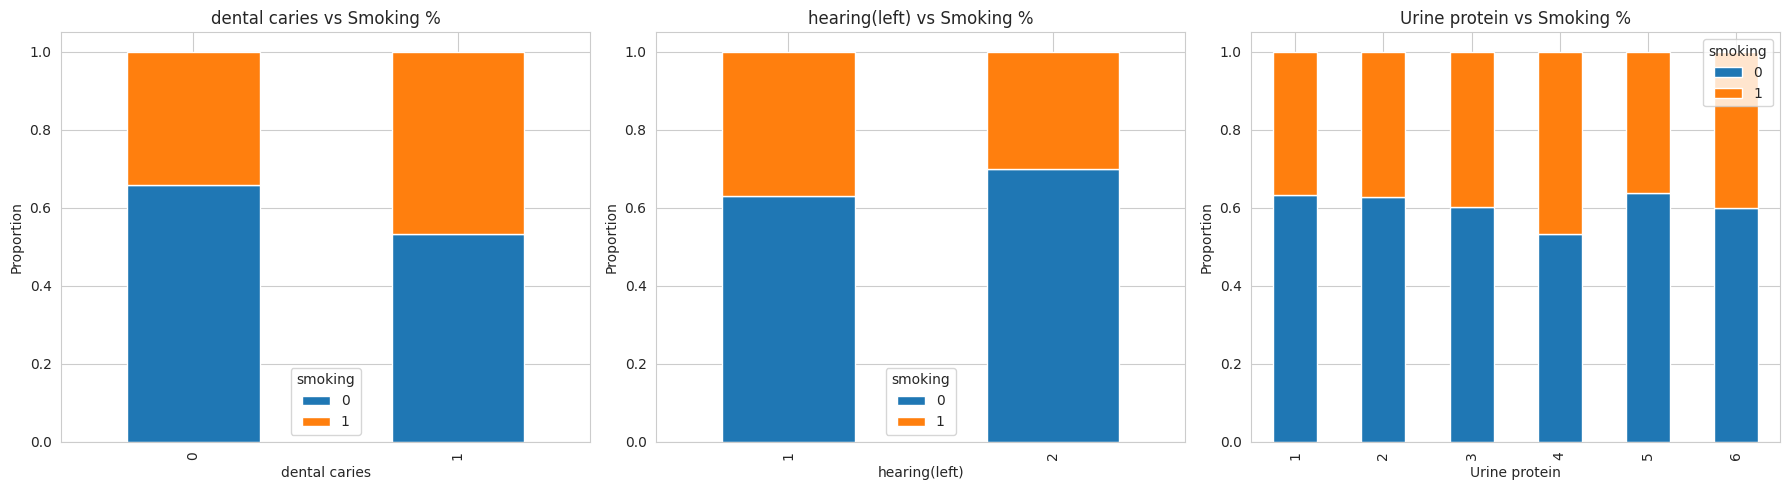

In [22]:
# C. Categorical Features vs Target
categorical_check = ['dental caries', 'hearing(left)', 'Urine protein']
plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_check):
    plt.subplot(1, 3, i + 1)
    # Compare proportions
    props = train.groupby(col)['smoking'].value_counts(normalize=True).unstack()
    props.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'{col} vs Smoking %')
    plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

In [23]:
# ==========================================
# 4. MULTIVARIATE ANALYSIS (Interactions)
# ==========================================
print("\n--- Step 4: Multivariate Analysis ---")
plt.figure(figsize=(14, 6))


--- Step 4: Multivariate Analysis ---


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Height vs Weight (Smoking Status)')

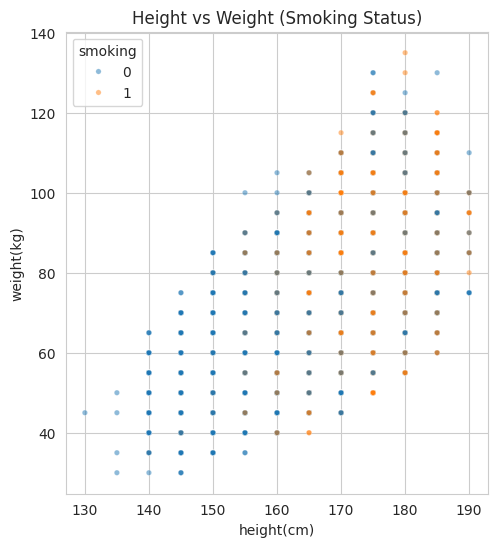

In [24]:
# Plot 1: Height vs Weight (BMI Proxy) colored by Smoking
plt.subplot(1, 2, 1)
sns.scatterplot(x='height(cm)', y='weight(kg)', hue='smoking', data=train, alpha=0.5, s=15)
plt.title('Height vs Weight (Smoking Status)')

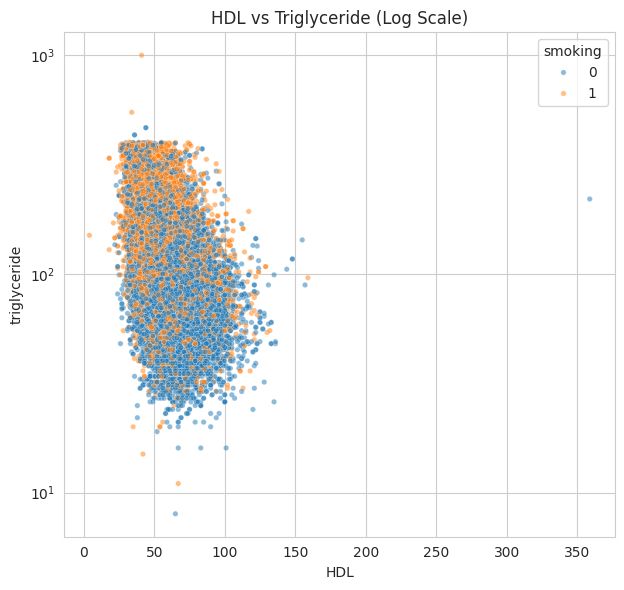

In [25]:
# Plot 2: HDL vs Triglycerides (Metabolic Health) colored by Smoking
plt.subplot(1, 2, 2)
sns.scatterplot(x='HDL', y='triglyceride', hue='smoking', data=train, alpha=0.5, s=15)
plt.yscale('log') # Log scale for better visibility
plt.title('HDL vs Triglyceride (Log Scale)')

plt.tight_layout()
plt.show()

In [26]:
# ==========================================
# 5. OUTLIER DETECTION (Z-Score)
# ==========================================
print("\n--- Step 5: Outlier Detection Check ---")
# Simple check: How many rows have a Gtp score > 3 std devs from mean?
from scipy import stats
z_scores = np.abs(stats.zscore(train[['Gtp', 'triglyceride', 'LDL']]))
outliers = (z_scores > 3).sum(axis=0)
print("Count of extreme outliers (Z-score > 3) in skewed columns:")
print(outliers)


--- Step 5: Outlier Detection Check ---
Count of extreme outliers (Z-score > 3) in skewed columns:
[623 641  63]


# Data Transformation

In [27]:
# STEP 1: REMOVE DUPLICATES
# ==========================================
print(f"Shape before dropping duplicates: {train.shape}")
train = train.drop_duplicates()
print(f"Shape after dropping duplicates: {train.shape}")

Shape before dropping duplicates: (38984, 23)
Shape after dropping duplicates: (33467, 23)


In [28]:
# STEP 2: FIX SKEWNESS (Log Transformation)
# ==========================================
# List of columns with high skewness (> 1)
skewed_cols = ['LDL', 'Gtp', 'fasting blood sugar', 'triglyceride', 'HDL']

# We use np.log1p (Log of x + 1) to avoid errors if any value is 0
# This creates new columns so we can compare later if needed
for col in skewed_cols:
    # Check if the column has negative values (Log fails on negatives)
    if (train[col] < 0).any():
        print(f"Skipping {col} due to negative values.")
    else:
        # Apply transformation
        train[col] = np.log1p(train[col])
        print(f"Transformed {col}.")

Transformed LDL.
Transformed Gtp.
Transformed fasting blood sugar.
Transformed triglyceride.
Transformed HDL.



New Skewness after Log Transform (Should be closer to 0):
fasting blood sugar    2.044179
Gtp                    0.936017
HDL                    0.090680
triglyceride           0.073486
LDL                   -0.702202
dtype: float64


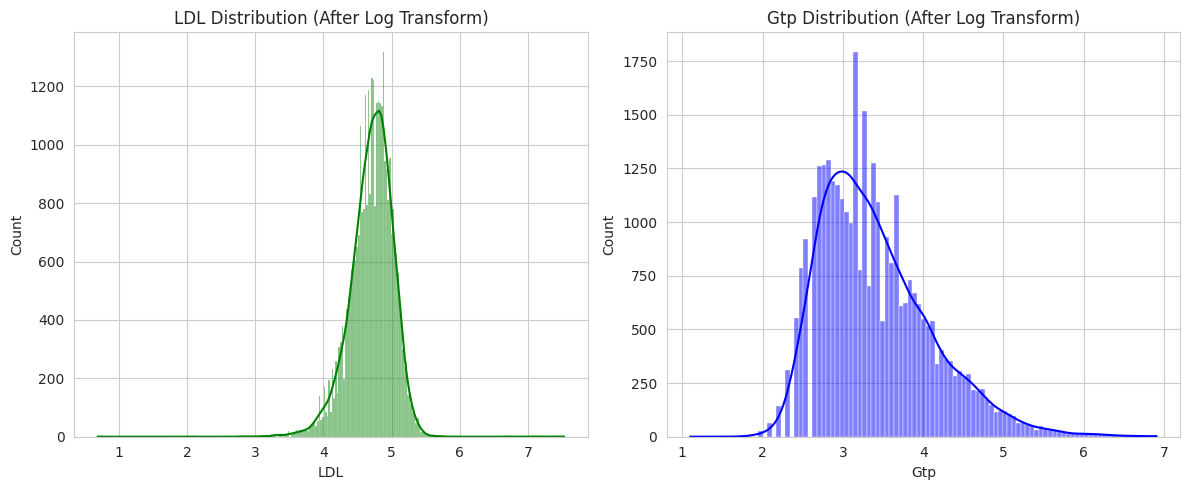

In [29]:
# STEP 3: VERIFY RESULTS
# ==========================================
# Check new skewness values
new_skewness = train[skewed_cols].skew().sort_values(ascending=False)
print("\nNew Skewness after Log Transform (Should be closer to 0):")
print(new_skewness)

# Visualize the improvement for the worst offender (LDL)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# We need to reload original for comparison or just imagine the 'before'
# Here is the distribution of the transformed data
sns.histplot(train['LDL'], kde=True, color='green')
plt.title('LDL Distribution (After Log Transform)')

plt.subplot(1, 2, 2)
sns.histplot(train['Gtp'], kde=True, color='blue')
plt.title('Gtp Distribution (After Log Transform)')

plt.tight_layout()
plt.show()

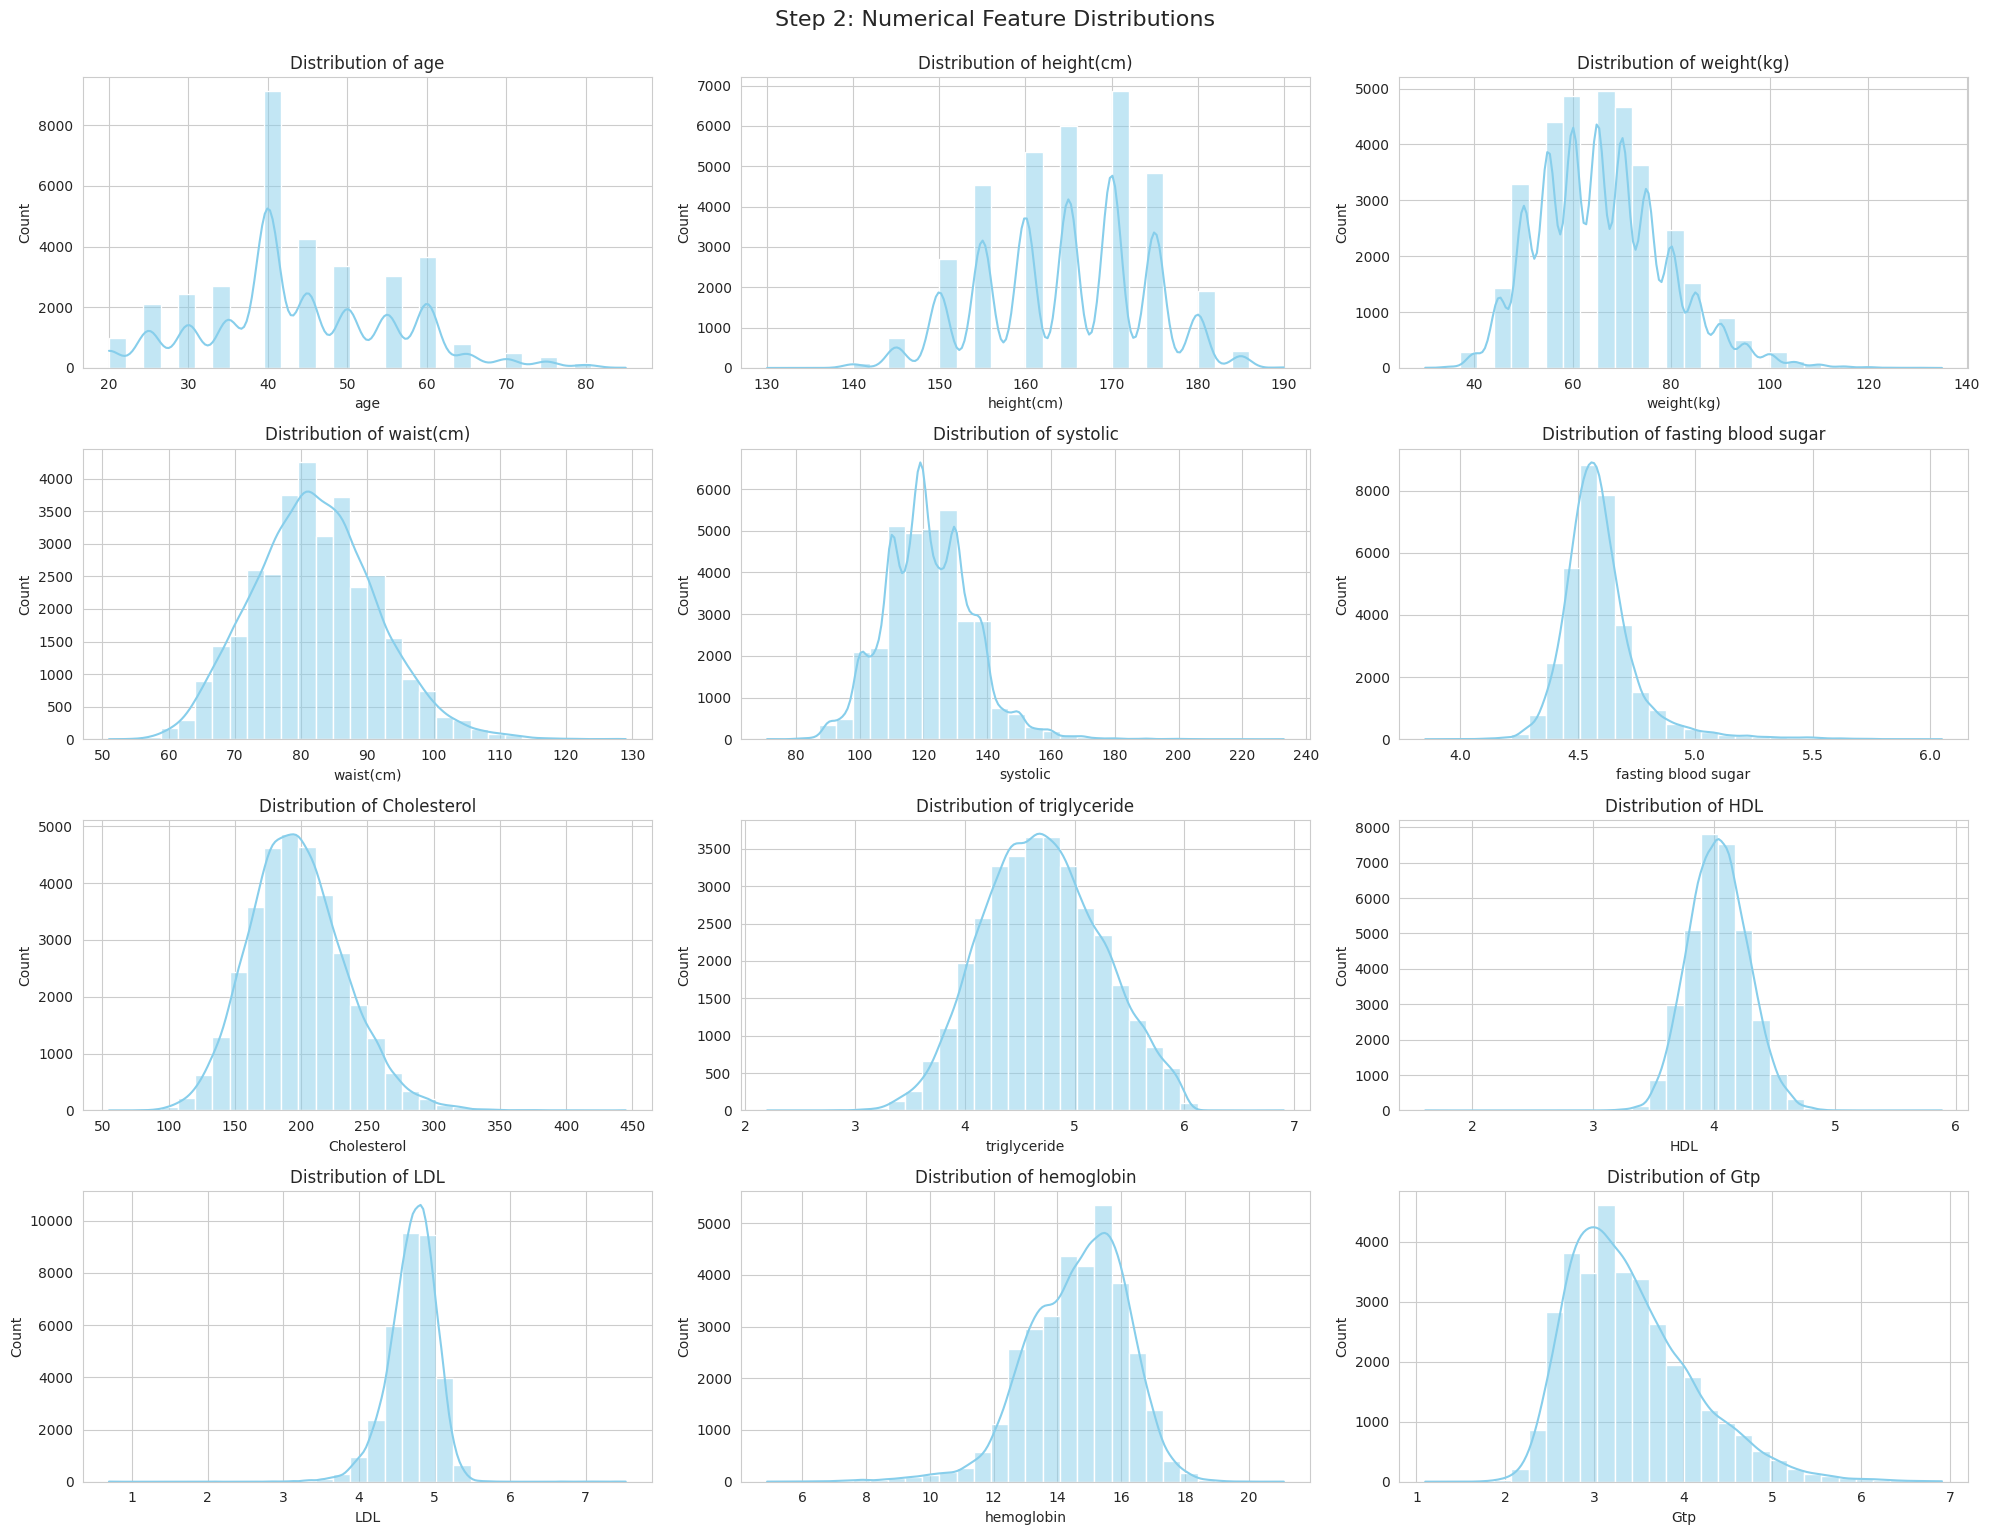

In [30]:
# Plot Histograms for all numerical features
# We use a loop to create a grid of plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.suptitle('Step 2: Numerical Feature Distributions', y=1.02, fontsize=16)
plt.show()

In [31]:
train['BMI'] = train['weight(kg)'] / ((train['height(cm)'] / 100) ** 2)

# Waist-to-Height Ratio: Often a better predictor of metabolic risk than BMI
train['Waist_Height_Ratio'] = train['waist(cm)'] / train['height(cm)']

# Pulse Pressure: Difference between Systolic and Relaxation (Diastolic) BP
# High pulse pressure can indicate arterial stiffness (common in smokers)
train['Pulse_Pressure'] = train['systolic'] - train['relaxation']

# HDL-to-Triglyceride Ratio: A strong marker for insulin resistance/metabolic syndrome
# (We add a small epsilon 1e-5 to avoid division by zero if Triglyceride is 0)
train['HDL_Trig_Ratio'] = train['HDL'] / (train['triglyceride'] + 1e-5)

print("New features created: BMI, Waist_Height_Ratio, Pulse_Pressure, HDL_Trig_Ratio")

New features created: BMI, Waist_Height_Ratio, Pulse_Pressure, HDL_Trig_Ratio


In [32]:
train.shape

(33467, 27)

# Model Training

In [33]:
# 1. PREPARE DATA
# ---------------------------------------------------------
# Drop the target to define features
X = train.drop('smoking', axis=1)
y = train['smoking']

In [34]:
# Split: 80% Train, 20% Test
# 'stratify=y' ensures the 63/37 split is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
# 2. FEATURE SCALING (MANDATORY for SVM/LR)
# ---------------------------------------------------------
# We fit the scaler ONLY on training data, then apply to test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data scaled successfully.")
print(f"Full Training Set: {X_train.shape}")

Data scaled successfully.
Full Training Set: (26773, 26)


In [36]:
# 2. Setup Tuning Data (Subset Strategy)
# -------------------------------------------------------
tune_size = 25000
if X_train.shape[0] < tune_size:
    tune_size = X_train.shape[0] # Use full size if dataset is small

X_tune, _, y_tune, _ = train_test_split(
    X_train, y_train, train_size=tune_size, stratify=y_train, random_state=42
)

print(f"Tuning Subset Size: {X_tune.shape} (Used for RandomizedSearch)")

# 3. Define Models & Parameter Grids
# -------------------------------------------------------

# --- Model A: Logistic Regression ---
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'] # 'liblinear' is good for binary
}

# --- Model B: Support Vector Machine (SVM) ---
# Note: probability=True is required for ROC-AUC
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf'],
    'gamma': ['scale', 0.1, 0.01]
}

# --- Model C: Neural Network (MLP) ---
mlp_params = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

model_configs = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42), lr_params),
    ("SVM", SVC(probability=True, random_state=42), svm_params),
    ("Neural Network", MLPClassifier(max_iter=500, random_state=42), mlp_params)
]

Tuning Subset Size: (25000, 26) (Used for RandomizedSearch)


In [37]:
# 4. Tuning Loop
# -------------------------------------------------------
best_estimators = {}

print("\nStarting Hyperparameter Tuning (on subset)...")

for name, model, params in model_configs:
    print(f"\n--- Tuning {name} ---")
    start_time = time.time()

    # Using ROC_AUC for binary classification scoring
    search = RandomizedSearchCV(
        model, params, n_iter=5, cv=3, scoring='roc_auc',
        n_jobs=-1, random_state=42, verbose=1
    )

    search.fit(X_tune, y_tune)

    elapsed = time.time() - start_time
    print(f"Done in {elapsed:.1f} seconds.")
    print(f"Best Params: {search.best_params_}")
    print(f"Best ROC-AUC (Subset): {search.best_score_:.4f}")

    best_estimators[name] = search.best_estimator_


Starting Hyperparameter Tuning (on subset)...

--- Tuning Logistic Regression ---
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Done in 4.5 seconds.
Best Params: {'solver': 'liblinear', 'C': 100}
Best ROC-AUC (Subset): 0.8154

--- Tuning SVM ---
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Done in 724.9 seconds.
Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 100}
Best ROC-AUC (Subset): 0.8227

--- Tuning Neural Network ---
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Done in 21.7 seconds.
Best Params: {'learning_rate_init': 0.001, 'hidden_layer_sizes': (128, 64), 'alpha': 0.01, 'activation': 'relu'}
Best ROC-AUC (Subset): 0.8200


In [38]:
# 5. Final Training (On FULL Dataset)
# -------------------------------------------------------
print("\nRetraining Best Models on FULL Dataset (31k rows)...")
# Note: 31k rows is safe for a SINGLE run of SVM (takes ~5 mins).

final_results = {}

for name, model in best_estimators.items():
    print(f"Training Final {name}...")

    # Train on the full X_train
    model.fit(X_train, y_train)

    # Evaluation
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] # For ROC-AUC

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    final_results[name] = {'Accuracy': acc, 'ROC-AUC': roc}

    print(f"--- {name} Results ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC-AUC:  {roc:.4f}")
    print(classification_report(y_test, y_pred))


Retraining Best Models on FULL Dataset (31k rows)...
Training Final Logistic Regression...
--- Logistic Regression Results ---
Accuracy: 0.7310
ROC-AUC:  0.8115
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      4242
           1       0.65      0.58      0.61      2452

    accuracy                           0.73      6694
   macro avg       0.71      0.70      0.70      6694
weighted avg       0.73      0.73      0.73      6694

Training Final SVM...
--- SVM Results ---
Accuracy: 0.7416
ROC-AUC:  0.8169
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      4242
           1       0.65      0.64      0.64      2452

    accuracy                           0.74      6694
   macro avg       0.72      0.72      0.72      6694
weighted avg       0.74      0.74      0.74      6694

Training Final Neural Network...
--- Neural Network Results ---
Accuracy: 0.7432
ROC-AUC:  0.8192
          

/tmp/ipython-input-3712547872.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=aucs, palette='viridis')


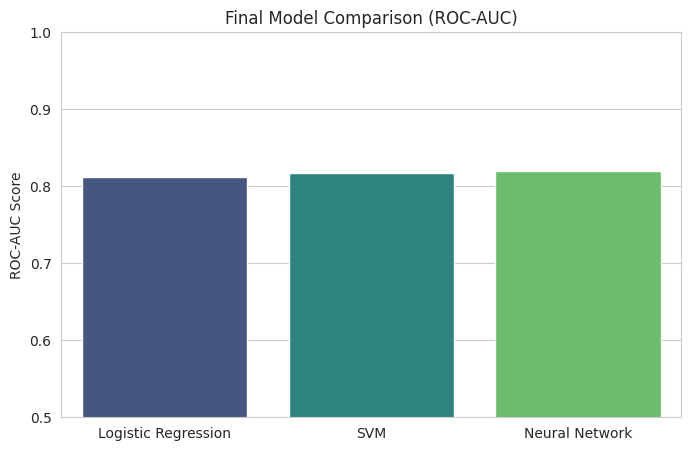

In [39]:
# 6. Comparison Plot
names = list(final_results.keys())
aucs = [final_results[n]['ROC-AUC'] for n in names]

plt.figure(figsize=(8, 5))
sns.barplot(x=names, y=aucs, palette='viridis')
plt.title("Final Model Comparison (ROC-AUC)")
plt.ylim(0.5, 1.0)
plt.ylabel("ROC-AUC Score")
plt.show()